Data Preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors (3).csv


In [ ]:
import pandas as pd

df = pd.read_csv(r"StudentPerformanceFactors.csv")

In [ ]:
#no of rows and columns in data
df.shape

(6607, 20)

In [ ]:

# Remove unnecessary columns for analysis and insights
# Use errors='ignore' to prevent error if column not found (use with caution)
df.drop(columns=[
    'Distance_from_Home',
    'Gender',
    'Internet_Access',
    'Learning_Disabilities'
], inplace=True, errors='ignore')

In [ ]:
#Value Count in column
# Example: Distribution of Parental Education Level
print(df['School_Type'].value_counts())

School_Type
Public     4598
Private    2009
Name: count, dtype: int64


In [ ]:
#Display columns
print(df.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Physical_Activity', 'Parental_Education_Level', 'Exam_Score'],
      dtype='object')


In [ ]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Tutoring_Sessions           6607 non-null   int64 
 9   Family_Income               6607 non-null   object
 10  Teacher_Quality             6529 non-null   object
 11  School_Type                 6607 non-null   object
 12  Peer_Influence              6607 non-null   object
 13  Physical_Activity           6607 non-null   int6

In [ ]:
# Statistical Information of data
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
# Check for null values in each column
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Parental_Education_Level      90
Exam_Score                     0
dtype: int64


In [ ]:
# Fill missing values in specific categorical columns with their mode
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)

In [ ]:
# Check number of duplicate rows
print(df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Confirm removal
print("Duplicate rows after removal:", df.duplicated().sum())

0
Duplicate rows after removal: 0


In [ ]:
'''#Label Encoding for categorical columns
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Encode each categorical column using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for inverse_transform if needed

# Print encoded column names
print("Encoded columns:", list(categorical_cols))'''

'#Label Encoding for categorical columns\nfrom sklearn.preprocessing import LabelEncoder\n\n# Identify categorical columns\ncategorical_cols = df.select_dtypes(include=\'object\').columns\n\n# Encode each categorical column using LabelEncoder\nlabel_encoders = {}\nfor col in categorical_cols:\n    le = LabelEncoder()\n    df[col] = le.fit_transform(df[col])\n    label_encoders[col] = le  # Save encoder for inverse_transform if needed\n\n# Print encoded column names\nprint("Encoded columns:", list(categorical_cols))'

In [ ]:
#first 5 rows of column
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Parental_Education_Level,Exam_Score
0,23,84,Low,High,No,7,73,Low,0,Low,Medium,Public,Positive,3,High School,67
1,19,64,Low,Medium,No,8,59,Low,2,Medium,Medium,Public,Negative,4,College,61
2,24,98,Medium,Medium,Yes,7,91,Medium,2,Medium,Medium,Public,Neutral,4,Postgraduate,74
3,29,89,Low,Medium,Yes,8,98,Medium,1,Medium,Medium,Public,Negative,4,High School,71
4,19,92,Medium,Medium,Yes,6,65,Medium,3,Medium,High,Public,Neutral,4,College,70


In [ ]:
#last 5 rows of column
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Parental_Education_Level,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,1,High,Medium,Public,Positive,2,High School,68
6603,23,76,High,Medium,No,8,81,Medium,3,Low,High,Public,Positive,2,High School,69
6604,20,90,Medium,Low,Yes,6,65,Low,3,Low,Medium,Public,Negative,2,Postgraduate,68
6605,10,86,High,High,Yes,6,91,High,2,Low,Medium,Private,Positive,3,High School,68
6606,15,67,Medium,Low,Yes,9,94,Medium,0,Medium,Medium,Public,Positive,4,Postgraduate,64


Data Visualization to draw meaningful insights

In [ ]:
import matplotlib.pyplot as plt

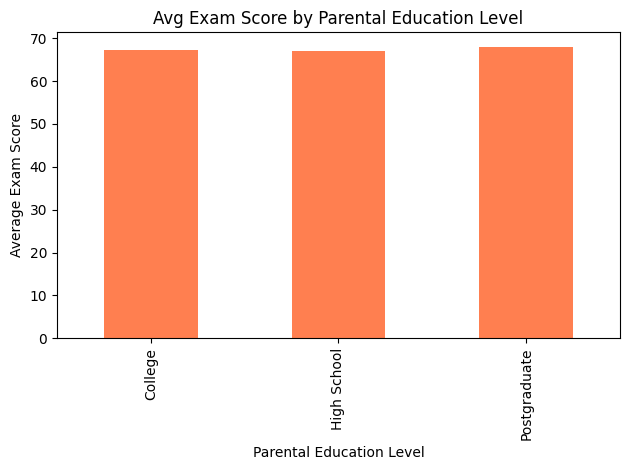

In [ ]:
# 1. Bar Chart: Average Exam Score by Parental Education Level
plt.figure()
df.groupby('Parental_Education_Level')['Exam_Score'].mean().plot(kind='bar', color='coral')
plt.title('Avg Exam Score by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Exam Score')
plt.tight_layout()

Bar Chart – Avg Exam Score by Parental Education Level

Insight: Students whose parents have higher education levels tend to perform better.

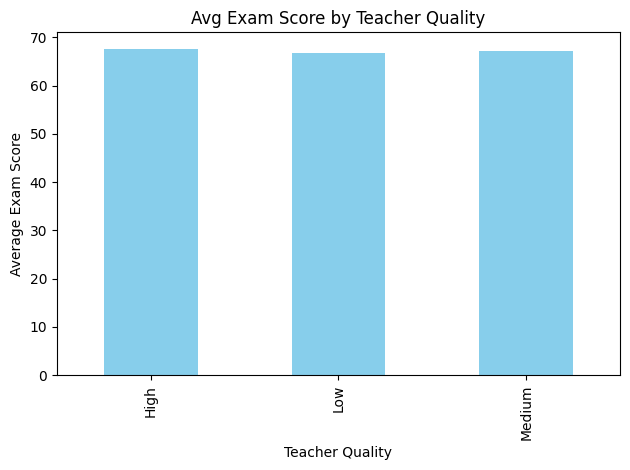

In [ ]:
# 2. Bar Chart: Average Exam Score by Teacher Quality
plt.figure()
df.groupby('Teacher_Quality')['Exam_Score'].mean().plot(kind='bar', color='skyblue')
plt.title('Avg Exam Score by Teacher Quality')
plt.xlabel('Teacher Quality')
plt.ylabel('Average Exam Score')
plt.tight_layout()

Bar Chart – Avg Exam Score by Teacher Quality

Insight: Higher teacher quality is positively associated with better exam performance.

Text(0, 0.5, 'Exam Score')

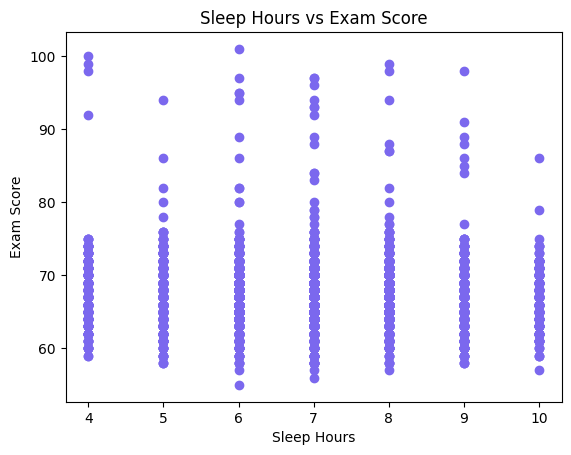

In [ ]:
# 3. Scatter Plot: Sleep Hours vs Exam Score
plt.figure()
plt.scatter(df['Sleep_Hours'], df['Exam_Score'], color='mediumslateblue')
plt.title('Sleep Hours vs Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')

Scatter Plot – Sleep Hours vs Exam Score

Insight: There may be a mild positive trend up to a point—students who get adequate sleep tend to perform better, but too much or too little sleep shows reduced performance.

Text(0, 0.5, 'Exam Score')

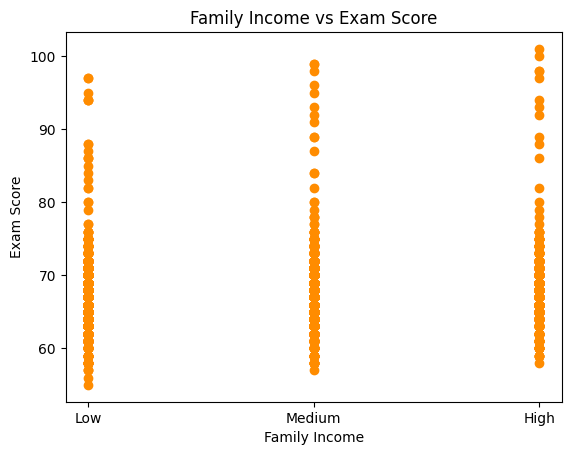

In [ ]:
# 4. Scatter Plot: Family Income vs Exam Score
plt.figure()
plt.scatter(df['Family_Income'], df['Exam_Score'], color='darkorange')
plt.title('Family Income vs Exam Score')
plt.xlabel('Family Income')
plt.ylabel('Exam Score')

Scatter Plot – Family Income vs Exam Score

Insight: A weak positive correlation may exist—higher-income families are slightly associated with better scores.

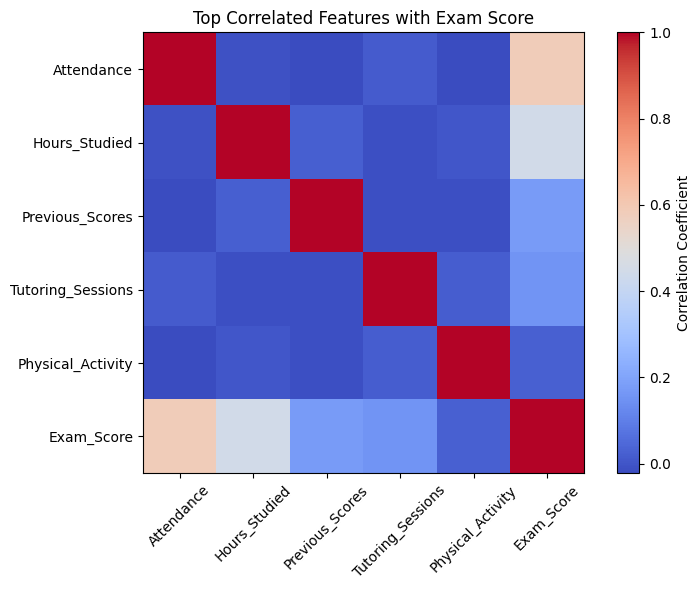

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Get top 5 features most correlated with Exam_Score
top_features = correlation_matrix['Exam_Score'].abs().sort_values(ascending=False)[1:6].index.tolist()
top_features.append('Exam_Score')

# Extract correlation matrix for selected features
focused_corr = numeric_df[top_features].corr()

# Plot the heatmap using matplotlib
plt.figure(figsize=(8, 6))
im = plt.imshow(focused_corr, cmap='coolwarm', interpolation='none')
plt.colorbar(im, label='Correlation Coefficient')
plt.xticks(ticks=np.arange(len(focused_corr.columns)), labels=focused_corr.columns, rotation=45)
plt.yticks(ticks=np.arange(len(focused_corr.index)), labels=focused_corr.index)
plt.title('Top Correlated Features with Exam Score')
plt.tight_layout()
plt.show()

The most impactful factors on exam scores are past performance, study hours, and attendance — confirming that consistent habits and discipline are the strongest predictors of academic success.

Text(0, 0.5, 'Exam Score')

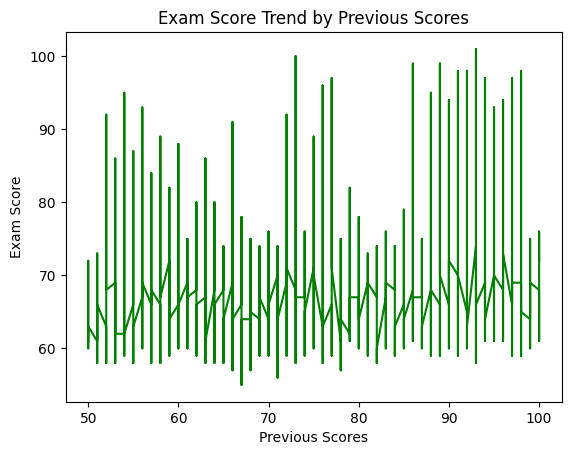

In [ ]:
# 8. Line Chart: Exam Score vs Previous Scores
plt.figure()
df_sorted = df.sort_values('Previous_Scores')
plt.plot(df_sorted['Previous_Scores'], df_sorted['Exam_Score'], color='green')
plt.title('Exam Score Trend by Previous Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')

Line Chart – Exam Score Trend by Previous Scores

Insight: A clear upward trend indicates students who performed well previously continue to do so.

Text(0.5, 1.0, 'Tutoring Sessions Distribution')

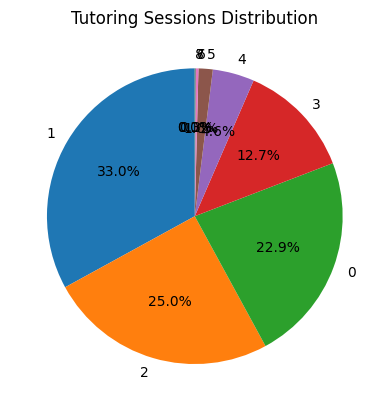

In [ ]:
# 9. Pie Chart: Tutoring Sessions Distribution
plt.figure()
counts = df['Tutoring_Sessions'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tutoring Sessions Distribution')

Pie Chart – Tutoring Sessions Distribution

Insight: A majority of students may fall into a few tutoring categories (e.g., 0–2 sessions), and fewer students have high tutoring engagement.

Text(0, 0.5, 'Frequency')

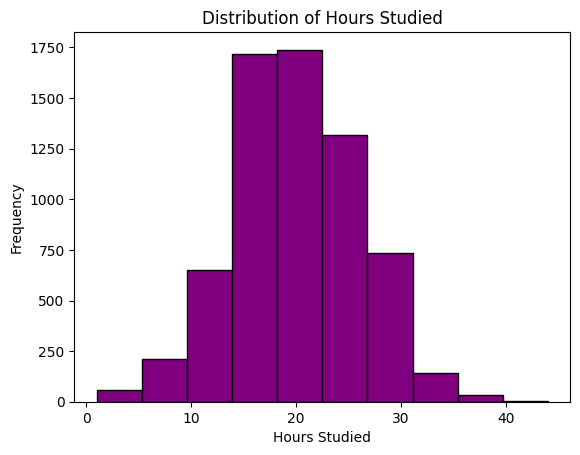

In [ ]:
# 10. Histogram: Hours Studied
plt.figure()
plt.hist(df['Hours_Studied'], bins=10, color='purple', edgecolor='black')
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')

Histogram – Hours Studied

Insight: Most students cluster around a moderate number of study hours (e.g., 2–4), while fewer study for extreme durations.

Text(0, 0.5, 'Frequency')

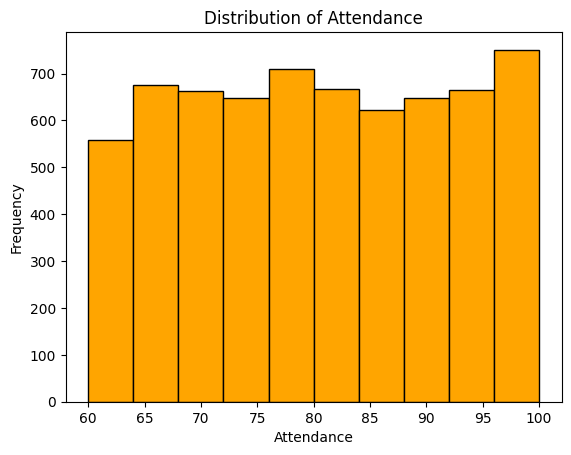

In [ ]:
# 11. Histogram: Attendance
plt.figure()
plt.hist(df['Attendance'], bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Attendance')
plt.xlabel('Attendance')
plt.ylabel('Frequency')

Histogram – Attendance

Insight: Students with higher attendance are more frequent, but there's some dropout toward lower ranges.